# RL Bandit Notebook

In [1]:
# Notebook for RL Work
# Written By Bryan

# ==== Bandit Imports ====
from Bandits import *    # Custom bandit classes

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import log_loss
from scipy.optimize import minimize



# ==== Mermaid display imports ====
import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    display(Image(url="https://mermaid.ink/img/" + base64_string))

## Environment Setup 

#### Trial Configurations

Testbed Means: [ 0.05598784 -0.6930621   0.94957065 -0.11071742]


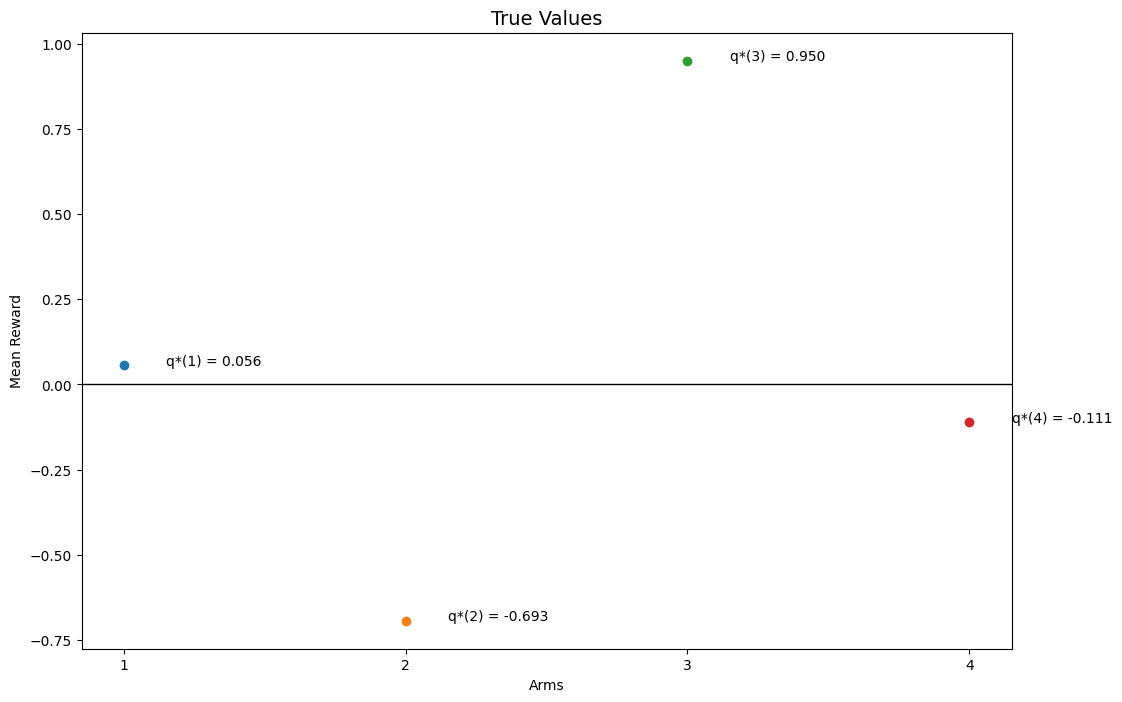

In [2]:
# Create and Show env
env = Testbed(k=4, num_problems=1000, stationary=False)
env.show_mean()


## eGreedy

100%|██████████| 1/1 [00:00<00:00, 149.99it/s]

Showing the following test: 
	Model name: eGreedy
	Action selection: simple_max
	Number of arms: 4
	Epsilon: 0.1
	Step-size/Learning rate (alpha): 1/n
	Steps: 500
	Initial Q: 1
	Average Reward: 0.8694853705408099


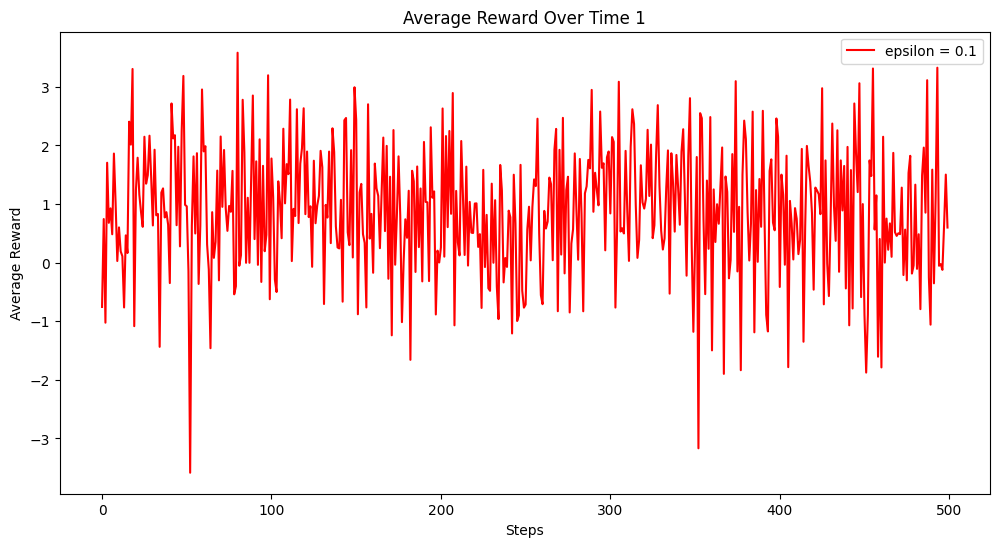

Testbed Means: [-0.25103082 -0.06000949  0.98254308 -0.05017556]


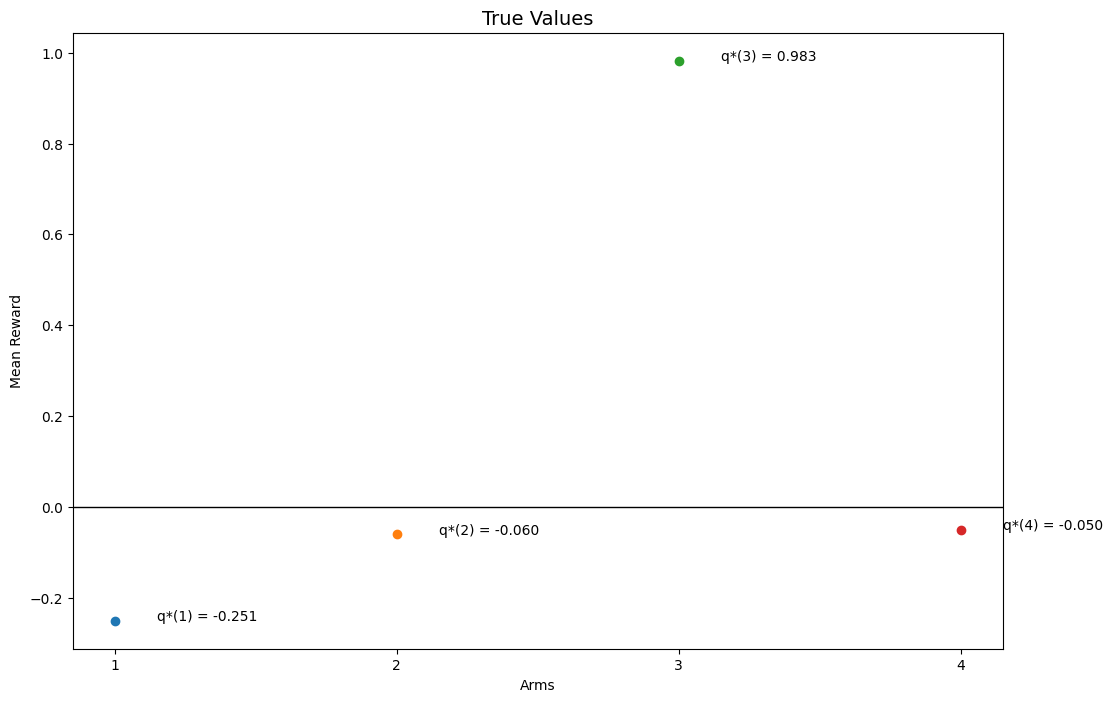

In [3]:
#Model Params
start_val = 1


# Create eGreedy task
# eg_01 = create_bandit_task(model_type="EG", model_params=[0,0.1], steps=trial_params, reward_values=reward_values, start_val=start_val)
eg_01 = create_bandit_task(model_type="EG", env=env, model_params=[0,0.1], steps=500, start_val=start_val )

tasks = [ eg_01]
for task in tasks:
    task.simulate(num_problems=1)
    task.show_results()
    # task.show_actions()

env.show_mean()


## Softmax

100%|██████████| 30/30 [00:00<00:00, 277.18it/s]


Showing the following test: 
	Model name: Softmax
	Action selection: Softmax | temperature = 10
	Number of arms: 4
	Learning rate: 0.6
	Steps: 500
	Initial Q: 1
	Average reward: 1.1376863379922584


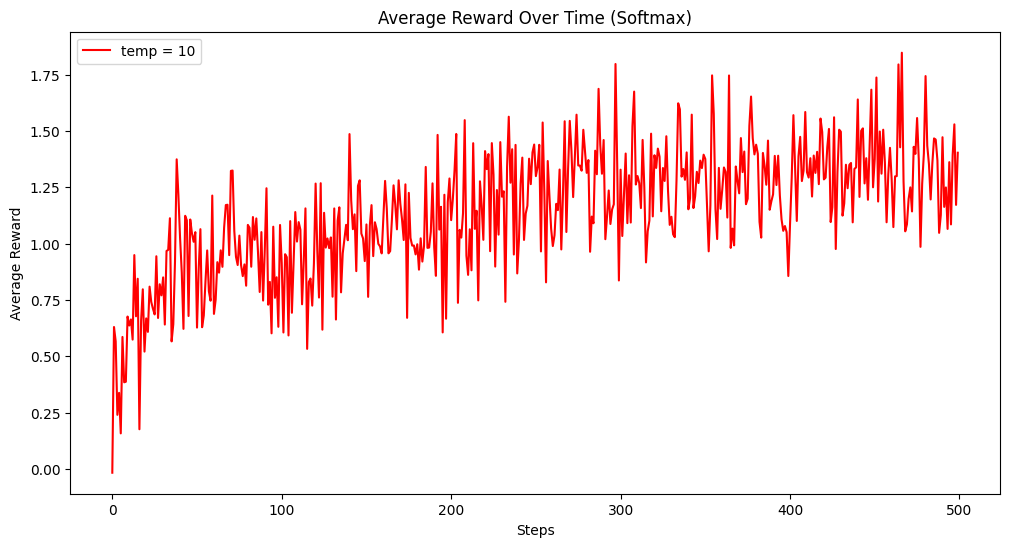

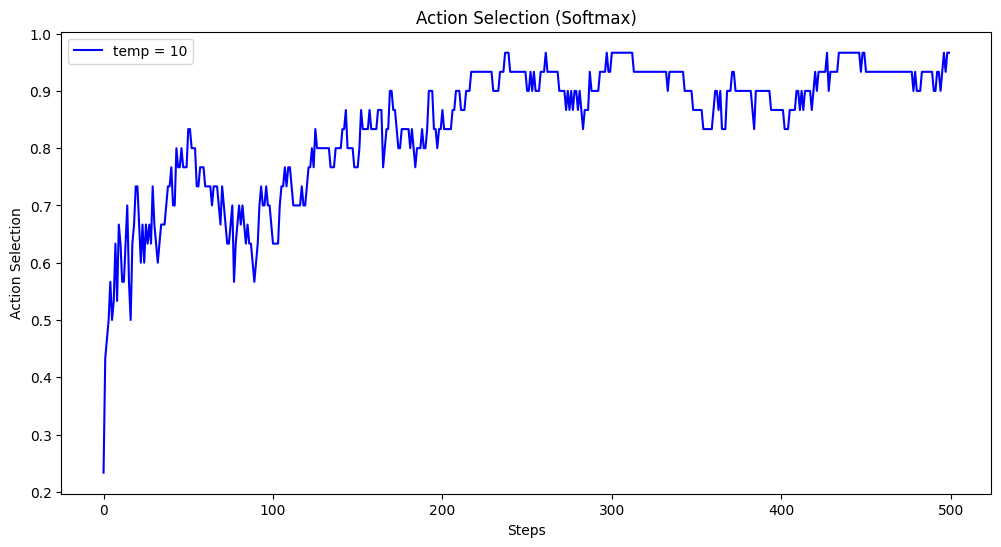

In [4]:
#Model Params
model_type = "SM"
alpha = 0.6
temp = 10                       # inverse temp
model_params = [alpha, temp]
# start_val = 1

SM = create_bandit_task(model_type, env.new(), model_params, steps=500, start_val=start_val)
SM.simulate(num_problems=30)
SM.show_results()
SM.show_actions()

## Softmax + Upper Confidence Bound

In [5]:
# Model Params
model_type = "SMUCB"
alpha = 0.1
temp = 10
uncertParam = .2
#uncert = 2
model_params = [alpha, temp, uncertParam]
# start_val = 1

SMUCB = create_bandit_task(model_type=model_type, env=env.new(), model_params=model_params, steps=500, start_val=start_val)

SMUCB.simulate(num_problems=1)

100%|██████████| 1/1 [00:00<00:00, 47.74it/s]


## Volatile Kalman Filter

Testbed Means: [0.02626262 1.19663284 0.43357757 0.83515925]


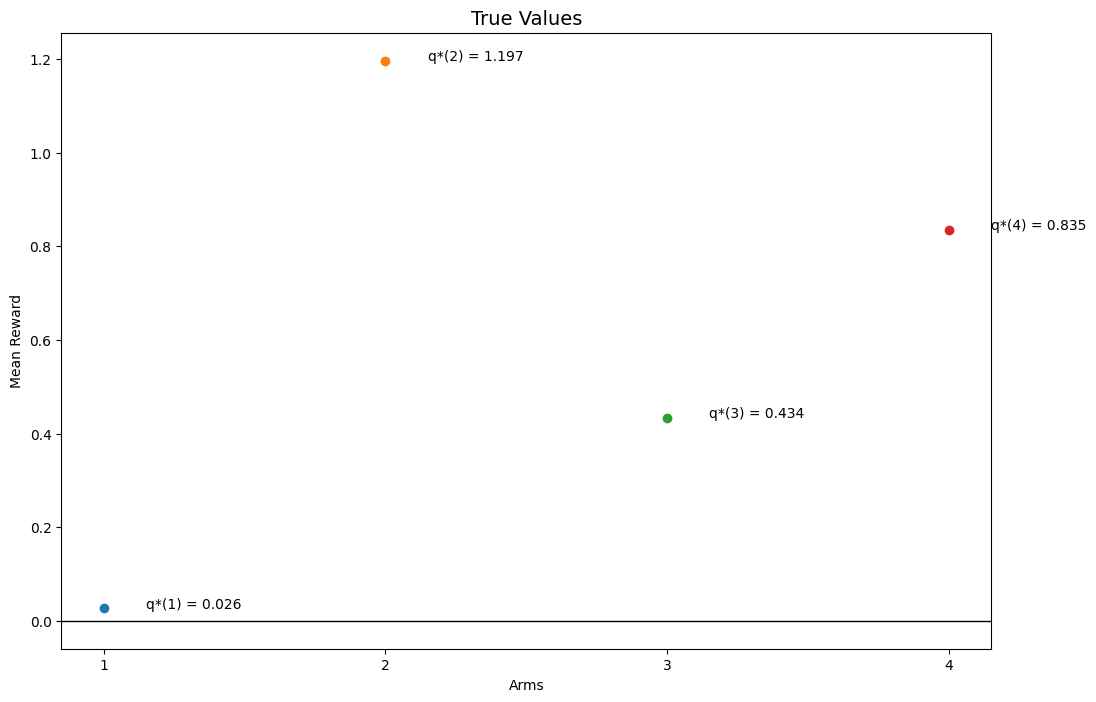

100%|██████████| 1/1 [00:00<00:00, 183.12it/s]


Showing the following test: 
	Model name: Volatile Kalman Filter
	Action selection: Volatile Kalman Filter | temp = 5
	Number of arms: 4
	Steps: 500
	Average reward: 0.8253442349194509


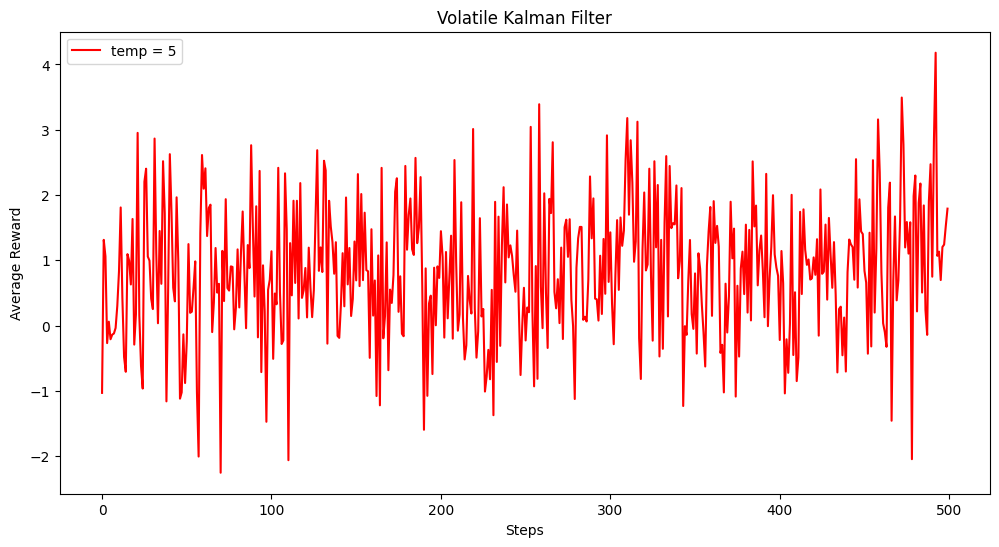

In [6]:
# Model Params
model_type = "VKF"                  
volatility_update_param = 0.6      # lamda
obervation_noise = 1              # Constant varience 
inital_volatility = 50             # Sigma
initial_posterior_mean = 0
initial_posterior_var = 10
temp = 5
start_val = 5

VKF = create_bandit_task(model_type=model_type, env=env.new(), model_params=[obervation_noise, volatility_update_param, inital_volatility, initial_posterior_mean, initial_posterior_var, temp], steps=500, start_val=start_val)

VKF.env.show_mean()
VKF.simulate(num_problems=1)

VKF.show_results()
 
# VKF.show_actions()

## Log-Likelihood

Plotting the following parameters:
number of parameters:
 79


100%|██████████| 79/79 [00:00<00:00, 250.48it/s]


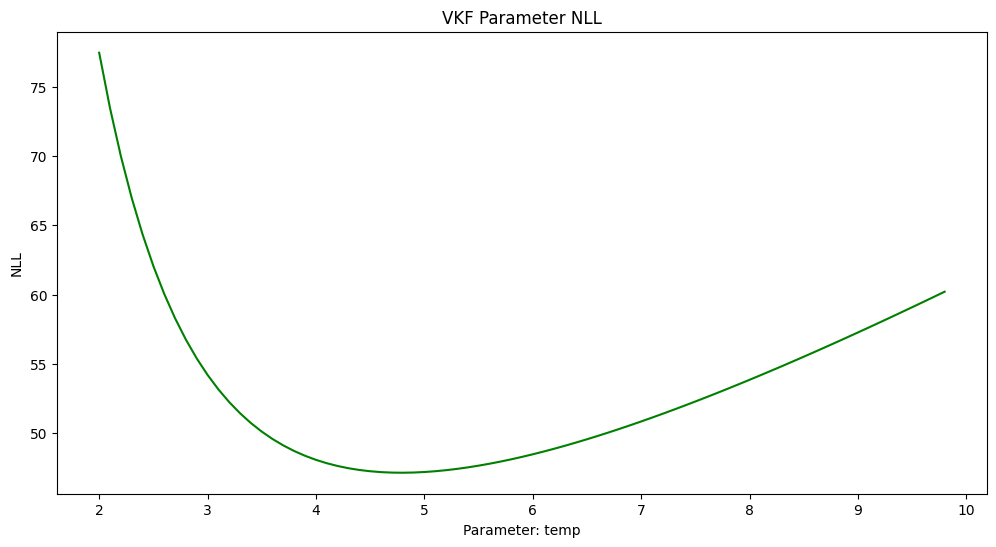

In [7]:
VKF.plot_parameter_likelihood("temp", [2, 10, 0.1], v_update= volatility_update_param, v_init= inital_volatility, temp = None)

Plotting the following parameters:
number of parameters:
 195


100%|██████████| 195/195 [00:00<00:00, 227.66it/s]


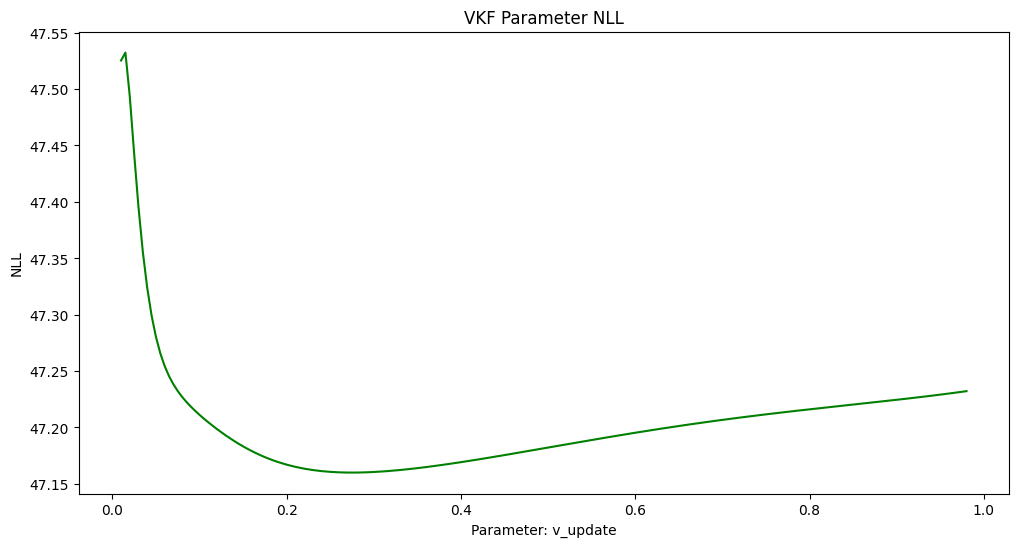

In [8]:
VKF.plot_parameter_likelihood("v_update", [0.01, 0.99, 0.005], v_update= None, v_init= inital_volatility, temp = temp)

Plotting the following parameters:
number of parameters:
 198


100%|██████████| 198/198 [00:00<00:00, 227.38it/s]


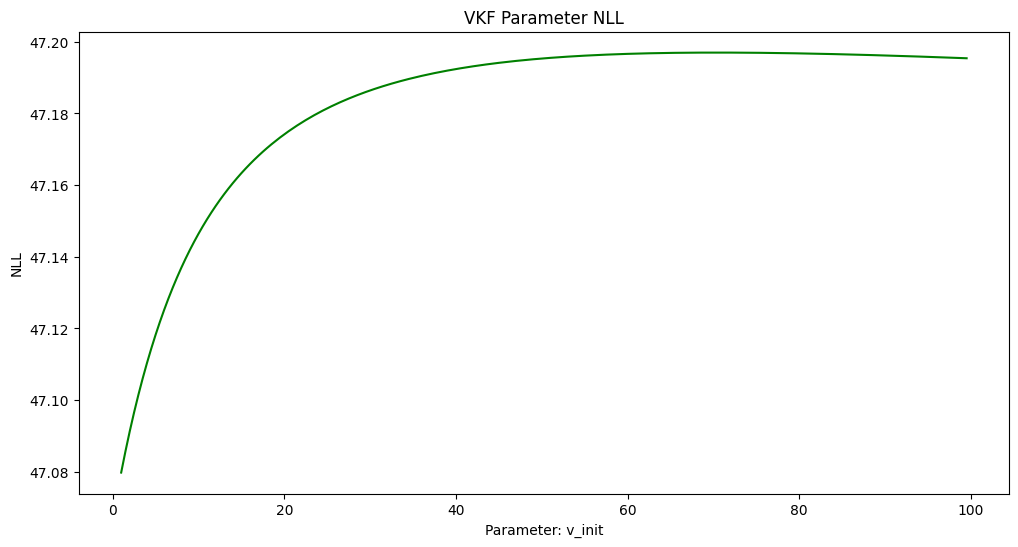

In [9]:
VKF.plot_parameter_likelihood("v_init", [1, 100, 0.5], v_update= volatility_update_param, v_init= None, temp = temp)

### Simulate Performance

In [10]:
# model_performance_summary(bandits=[eg_01, SM, SMUCB])

In [11]:
eg_01.simulate_LL(num_problems=500)
# SM.simulate_LL()
# SMUCB.simulate_LL()
# print(SMUCB.selection_matrix)

# print(eg_01.total_LL_array)
# print(SM.total_LL_array)
# print(SMUCB.total_LL_array)

  0%|          | 1/500 [00:00<00:00, 1079.61it/s]


IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
print(eg_01.total_LL_array)
plt.plot(eg_01.total_LL_array)

## Model Validation

#### Param Recovery
Fit data to model it was simulated with
<ol>
<li>Simulate choices and rewards using chosen parameter values(acts as ground truth)</li>
<li>
Run fitting procedure (neg log likelihood function) on simulated choice AND reward data.
See if we an estimate simulated parameter values (estimates are fitted parameter values)
</li>
</ol>

In [ ]:
# Run this to display mermaid flowchart of parameter recovery
mm("""
flowchart LR
   subgraph input-parameters
   direction TB
   id1([epsilon])
   id2([alpha])
   id3([etc...])
   id1 ~~~ id2 ~~~ id3
   end

   subgraph output-parameters
   direction TB
   id4([epsilon])
   id5([alpha])
   id6([etc...])
   id4 ~~~ id5 ~~~ id6
   end

   simData[(Simulated Data)]
   model((RL Model))
   n([noise])
   fm{{fit data to model}}

   input-parameters --"(1) input"--> model
   model --"(1) creates"--> simData
   simData -."(2) (optional) Add".-> n
   simData --> fm
   n -.-> fm
   fm ~~~ output-parameters
   fm --"(3) Outputs"--> output-parameters
   input-parameters o-- "(4) compare"  --o output-parameters

""")

#### Model Recovery

Fit data to all models
<ol>
<li>
Use simulated choice and reward data from paramater recovery step
</li>

<li>
Calculate negative log likelihood values using each model on the simulated data
</li>
</ol>
